In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [87]:
credit_df = pd.read_csv("default_rates.csv")

In [88]:
credit_df

,year_month,person_or_corporation,state_brazil,default_rate
0,2004-01-01,P,AC,4.98
1,2004-01-01,P,AL,8.33
2,2004-01-01,P,AP,4.82
3,2004-01-01,P,AM,9.18
4,2004-01-01,P,BA,9.48
...,...,...,...,...
13171,2024-04-01,C,RR,4.26
13172,2024-04-01,C,SC,1.99
13173,2024-04-01,C,SP,2.31
13174,2024-04-01,C,SE,3.65


In [89]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13176 entries, 0 to 13175
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year_month             13176 non-null  object 
 1   person_or_corporation  13176 non-null  object 
 2   state_brazil           13176 non-null  object 
 3   default_rate           13176 non-null  float64
dtypes: float64(1), object(3)
memory usage: 411.9+ KB


In [90]:
credit_df.isnull().sum()

year_month               0
person_or_corporation    0
state_brazil             0
default_rate             0
dtype: int64

In [91]:
credit_df["year_month"].unique()

array(['2004-01-01', '2004-02-01', '2004-03-01', '2004-04-01',
       '2004-05-01', '2004-06-01', '2004-07-01', '2004-08-01',
       '2004-09-01', '2004-10-01', '2004-11-01', '2004-12-01',
       '2005-01-01', '2005-02-01', '2005-03-01', '2005-04-01',
       '2005-05-01', '2005-06-01', '2005-07-01', '2005-08-01',
       '2005-09-01', '2005-10-01', '2005-11-01', '2005-12-01',
       '2006-01-01', '2006-02-01', '2006-03-01', '2006-04-01',
       '2006-05-01', '2006-06-01', '2006-07-01', '2006-08-01',
       '2006-09-01', '2006-10-01', '2006-11-01', '2006-12-01',
       '2007-01-01', '2007-02-01', '2007-03-01', '2007-04-01',
       '2007-05-01', '2007-06-01', '2007-07-01', '2007-08-01',
       '2007-09-01', '2007-10-01', '2007-11-01', '2007-12-01',
       '2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
       '2008-05-01', '2008-06-01', '2008-07-01', '2008-08-01',
       '2008-09-01', '2008-10-01', '2008-11-01', '2008-12-01',
       '2009-01-01', '2009-02-01', '2009-03-01', '2009-

In [92]:
# change data type formate
credit_df['year_month'] = pd.to_datetime(credit_df['year_month'], format='%Y-%m-%d')

In [93]:
credit_df.describe()

,year_month,default_rate
count,13176,13176.000000
mean,2014-02-14 20:03:56.065573888,3.578739
min,2004-01-01 00:00:00,0.360000
25%,2009-01-24 06:00:00,2.250000
50%,2014-02-15 00:00:00,3.300000
75%,2019-03-08 18:00:00,4.530000
max,2024-04-01 00:00:00,16.760000
std,NaN,1.814884


In [94]:
# Convert categorical columns to numerical values and save mappings
person_or_corp_mapping = dict(enumerate(credit_df['person_or_corporation'].astype('category').cat.categories))
state_brazil_mapping = dict(enumerate(credit_df['state_brazil'].astype('category').cat.categories))

credit_df['person_or_corporation'] = credit_df['person_or_corporation'].astype('category').cat.codes
credit_df['state_brazil'] = credit_df['state_brazil'].astype('category').cat.codes


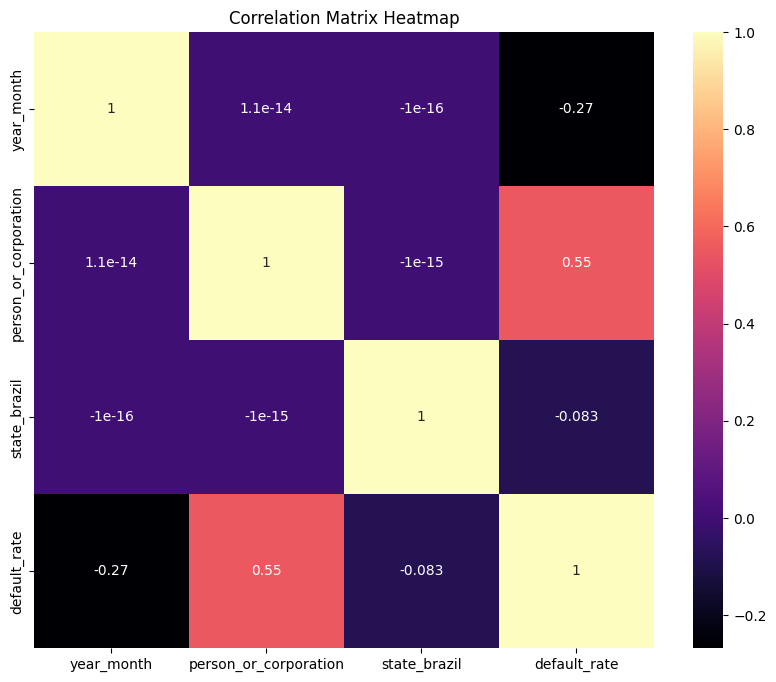

In [95]:
# Calculate the correlation matrix
correlation_matrix = credit_df.corr()
# Plot heatmap with a different color map
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="magma")
plt.title('Correlation Matrix Heatmap')
plt.show()

### visualization

In [97]:
# Convert numerical codes back to original string values using the saved mappings
credit_df['person_or_corporation'] = credit_df['person_or_corporation'].map(person_or_corp_mapping)
credit_df['state_brazil'] = credit_df['state_brazil'].map(state_brazil_mapping)

In [98]:
credit_df.head(2)

,year_month,person_or_corporation,state_brazil,default_rate
0,2004-01-01,P,AC,4.98
1,2004-01-01,P,AL,8.33


In [101]:
# Default Rates by State in April 2024
filtered_df = credit_df[credit_df['year_month'] == '2024-04-01']

fig = px.bar(
    filtered_df, 
    x='state_brazil', 
    y='default_rate', 
    color='default_rate', 
    color_continuous_scale='viridis', 
    title='Default Rates by State in April 2024',
    labels={'state_brazil': 'State', 'default_rate': 'Default Rate'},
    hover_data={'state_brazil': True, 'default_rate': ':.2f'}
)
fig.update_layout(
    xaxis_title='State',
    yaxis_title='Default Rate',
    xaxis_tickangle=-45,
    plot_bgcolor='white'
)
fig.show()


In [129]:
# Default Rates Over Time by State
credit_df.sort_values(by=['year_month', 'state_brazil'], inplace=True)

fig = px.scatter(credit_df, x='year_month', y='default_rate', color='state_brazil',
                 title='Default Rates Over Time by State',
                 labels={'default_rate': 'Default Rate', 'year_month': 'Year-Month', 'state_brazil': 'State'},
                 hover_name='state_brazil', 
                 hover_data={'year_month': True}) 

fig.update_layout(xaxis_title='Year-Month', yaxis_title='Default Rate', legend_title='State', height=800,width=1000)
fig.show()


In [144]:
# mean default rate and standard deviation over time
mean_default_rate = credit_df.groupby(pd.Grouper(key='year_month', freq='M'))['default_rate'].mean().reset_index()
std_default_rate = credit_df.groupby(pd.Grouper(key='year_month', freq='M'))['default_rate'].std().reset_index()

# Create Plotly figure
fig = px.bar(mean_default_rate, x='year_month', y='default_rate', title='Average Default Rates Over Time',
             labels={'default_rate': 'Mean Default Rate'},
             error_y=std_default_rate['default_rate'], error_y_minus=std_default_rate['default_rate'])
fig.update_layout(xaxis_title='Date', yaxis_title='Mean Default Rate')
fig.show()

In [151]:
# Calculate mean default rates pivot table over state and person_or_corporation
default_rate_pivot = credit_df.pivot_table(values='default_rate', index='state_brazil', columns='person_or_corporation', aggfunc='mean').reset_index()

fig = px.bar(default_rate_pivot, x='state_brazil', y=['P', 'C'], color_discrete_sequence=['#1f77b4', '#ff7f0e'],
             title='Comparison of Default Rates between Individuals and Corporations by State',
             labels={'value': 'Mean Default Rate', 'state_brazil': 'State', 'variable': 'Person/Corporation'},
             barmode='group')

fig.update_layout(xaxis_title='State', yaxis_title='Mean Default Rate')
fig.show()